# SETUP

In [3]:
'''Ravi Shankar HW 5 Question 1 CNN'''
#Referenced for CNN: https://keras.io/examples/vision/mnist_convnet/
#Referenced for data visualization: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

##SETUP
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Prepare the data

In [1]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print(x_train[0])

NameError: name 'keras' is not defined

# Build the model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Train the model

In [7]:
batch_size = 128
epochs = 15


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 31s 73ms/step - loss: 0.3650 - accuracy: 0.8904 - val_loss: 0.0811 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 29s 68ms/step - loss: 0.1138 - accuracy: 0.9652 - val_loss: 0.0605 - val_accuracy: 0.9827
Epoch 3/15
422/422 [==============================] - 32s 75ms/step - loss: 0.0836 - accuracy: 0.9742 - val_loss: 0.0466 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.0415 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.0372 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 30s 72ms/step - loss: 0.0570 - accuracy: 0.9826 - val_loss: 0.0370 - val_accuracy: 0.9890
Epoch 7/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0510 - accuracy: 0.9838 - val_loss: 0.0335 - val_accuracy:

# Evaluate the trained model

313/313 [==============================] - 2s 5ms/step - loss: 0.0246 - accuracy: 0.9921
Test loss: 0.02461307868361473
Test accuracy: 0.9921000003814697
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


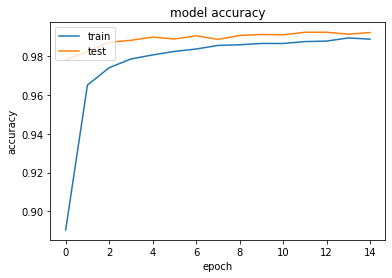

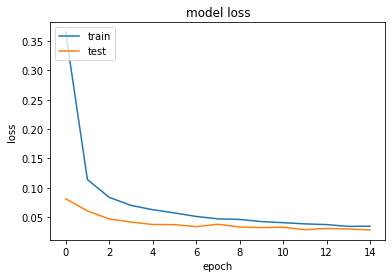

In [8]:

score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()